In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#create dataframe to read csv
df=pd.read_csv("hr_employee_churn_data.csv")

In [4]:
#show first 5 rows
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [5]:
#see dataframe structure like columns and its datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [6]:
#number of rows and columns
df.shape

(14999, 10)

In [7]:
##FEATURE ENGINEERING

In [8]:
#copy dataframe df to another to make any changes
df1=df.copy()

In [9]:
#1.Remove unwanted features-empid is not required
df1=df1.drop(['empid'],axis=1)

In [10]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


In [11]:
#2.Handle missing values
#check for null values
df1.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [12]:
#satisfaction_level -2 to fill this missing value describe the feature
df1['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [13]:
#avg function,mean.median,mode,knn model,delete missing values are some different methods to handle(impute) the missing values.
#we will use mean
df1['satisfaction_level'].fillna(df1['satisfaction_level'].mean(),inplace=True)

In [14]:
#check for null values
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [15]:
#handling categorical features
#check for categorical features
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


In [16]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary                    object
left                       int64
dtype: object

In [17]:
#unique values
df1['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [18]:
salary_dummy = pd.get_dummies(df1['salary'], drop_first=True).astype(int)

In [19]:
#encoded columns
salary_dummy

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [20]:
#concatenate the encoded columns
df1=pd.concat([df1,salary_dummy],axis=1)

In [21]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,1,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,1
2,0.11,0.88,7,272,4,0,0,medium,1,0,1
3,0.72,0.87,5,223,5,0,0,low,1,1,0
4,0.37,0.52,2,159,3,0,0,low,1,1,0


In [22]:
#Now we no need salary column
df1.drop(['salary'],axis=1,inplace=True)

In [23]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0


In [24]:
#we are done with feature engineering

In [25]:
#SPLITTING THE DATA INTO TRAIN AND TEST SET

In [26]:
#split dataset into features and target
X=df1.drop(['left'],axis=1)
y=df1['left']

In [27]:
#split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
len(X_train)

11999

In [29]:
len(X_test)

3000

In [30]:
len(y_train)

11999

In [31]:
len(y_test)

3000

In [32]:
import math
total = 14999
part1 = 11999
part2 = 3000

# Calculate the ratio
gcd = math.gcd(part1, part2)
ratio = (part1 // gcd, part2 // gcd)

# Calculate the percentages
percentage_part1 = (part1 / total) * 100
percentage_part2 = (part2 / total) * 100

print(f"Ratio: {ratio[0]}:{ratio[1]}")
print(f"Percentage of part1: {percentage_part1:.2f}%")
print(f"Percentage of part2: {percentage_part2:.2f}%")


Ratio: 11999:3000
Percentage of part1: 80.00%
Percentage of part2: 20.00%


In [33]:
#the data is split as 80% 20% 

In [34]:
#done with data splitting

In [35]:
#MODEL SELECTION & BUILDING

In [36]:
#from data we can analyse that the data is labelled and its a supervised learning
#its a classification type where we need to predict wheather the employee left or not

In [37]:
#we select RANDOM FOREST CLASSIFIER AND XGBOOST CLASSIFIER ALGORITHMS 

In [38]:
#we also perform hyperparameter tuning
#we use GRID SEARCH CV

In [39]:
#model selection

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
#create model parameters
model_param={
#random forest
'RandomForestClassifier':{
    'model':RandomForestClassifier(),
    'param':{
        'n_estimators':[10,50,100,130],
        'criterion':['gini','entropy'],
        'max_depth':range(2,4,1),
        'max_features':['auto','log2']
            }
                         },
    
'XGBClassifier':{
    'model':XGBClassifier(objective='binary:logistic'),
    'param':{
        'learning_rate':[0.5,0.1,0.01,0.001],
        'max_depth': [3,5,10,20],
        'n_estimators':[10,50,100,200]
             }
                 }
}    

In [41]:
#command to apply gridsearchcv
scores=[]
for model_name,mp in model_param.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_params':model_selection.best_params_
    })


c:\Users\karis_h66oqv0\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\karis_h66oqv0\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\karis_h66oqv0\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\karis_h66oqv0\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\k

In [42]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9170612204068022,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 50}},
 {'model': 'XGBClassifier',
  'best_score': 0.9909995109480938,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}}]

In [43]:
#from the above result we can conclude that XGBClassifier is best model with best accuracy score

In [44]:
#model building for XGBClassifier
#initialise the model:
model_xgb=XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators=200)

In [46]:
#fit the model
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
#see the score of the model:
model_xgb.score(X_test,y_test)

0.9916666666666667

In [48]:
#the score is pretty good

In [49]:
#see the test set
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,0,1
13378,0.55,0.96,3,194,3,0,0,0,1
10233,0.72,0.67,5,210,2,0,0,0,1
4719,0.96,0.75,4,177,2,0,0,1,0
7003,0.96,0.54,3,198,3,0,0,1,0


In [50]:
#see only the first row
X_test[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,0,1


In [51]:
#pass this row into the model to check the prediction
model_xgb.predict(X_test[:1])

array([1])

In [52]:
#the model predicts that the employee will leave
#lets see the real output from the existing dataset in that specific row 1670
df1.iloc[1670]

satisfaction_level         0.44
last_evaluation            0.57
number_project             2.00
average_montly_hours     141.00
time_spend_company         3.00
Work_accident              0.00
promotion_last_5years      0.00
left                       1.00
low                        0.00
medium                     1.00
Name: 1670, dtype: float64

In [53]:
#left value-1 and predicted value-1

In [54]:
#its a classification problem so we can see the confusion matrix
#confusion matrix is used to evaluate the accuracy of the model
#count the true value with resoect to the predicted value

In [55]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[2290,    9],
       [  16,  685]], dtype=int64)

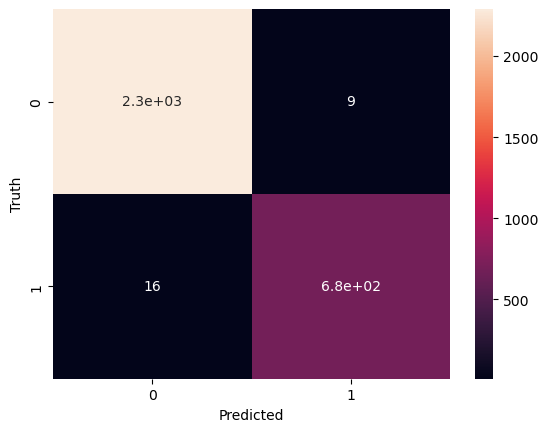

In [56]:
#graphical confusion matrix
import matplotlib.pyplot as plt
import seaborn as sn
# plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [57]:
#save the model
import pickle

In [58]:
# Save the model as a pickle file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)